##Rewriten Assignment 6A using the below convolutions in the order given below:
1. Normal Convolution
2. Spatially Separable Convolution  (Conv2d(x, (3,1)) followed by Conv2D(x,(3,1))
3. Depthwise Separable Convolution
4. Grouped Convolution (use 3x3, 5x5 only)
5. Grouped Convolution (use 3x3 only, one with dilation = 1, and another with dilation = 2) 

###Used all of the 5 above at least once in a network

###Trained this new model for 50 epochs.
 

In [0]:
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D, SeparableConv2D, DepthwiseConv2D
from keras.layers import Activation, Flatten, Dense, Dropout, Concatenate
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils

In [0]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

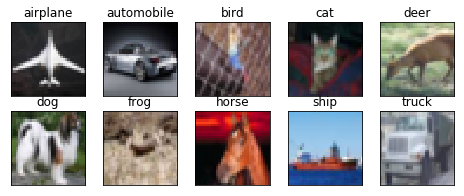

In [27]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [0]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [0]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

In [35]:
from keras.models import Model
from keras.layers import Input

# Define the model
inp=Input(shape=(32,32,3))

#Normal Convolution
c1=Convolution2D(48, 3, 3,border_mode='same')(inp)
a1=Activation('relu')(c1)
b1=BatchNormalization()(a1)
d1=Dropout(0.20)(b1)

c2=Convolution2D(96, 3, 3,border_mode='same')(d1)
a2=Activation('relu')(c2)
b2=BatchNormalization()(a2)
d2=Dropout(0.20)(b2)

m1=MaxPooling2D(pool_size=(2, 2))(d2)
c3=Convolution2D(24, 1, 1)(m1)

#Spatially Seperatble Convolution
c4=Convolution2D(48, 3, 1,border_mode='same')(c3)
c5=Convolution2D(128, 1, 3,border_mode='same')(c4)
a5=Activation('relu')(c5)
b5=BatchNormalization()(a5)
d5=Dropout(0.20)(b5)

c6=Convolution2D(96, 3, 3,border_mode='same')(d5)
a6=Activation('relu')(c6)
b6=BatchNormalization()(a6)
d6=Dropout(0.20)(b6)

m2=MaxPooling2D(pool_size=(2, 2))(d6)
c7=Convolution2D(24, 1, 1)(m2)

#Depthwise Seperable Convolution
s1=SeparableConv2D(48, 3, 3,border_mode='same')(c7)
a7=Activation('relu')(s1)
b7=BatchNormalization()(a7)
d7=Dropout(0.20)(b7)

c8=Convolution2D(96, 3, 3,border_mode='same')(d7)
a8=Activation('relu')(c8)
b8=BatchNormalization()(a8)
d8=Dropout(0.20)(b8)

m3=MaxPooling2D(pool_size=(2, 2))(d8)
c9=Convolution2D(24, 1,1)(m3)

#Grouped Convolution with 3x3 and 5x5
c10=Convolution2D(48, 3, 3,border_mode='same')(c9)
c11=Convolution2D(96, 5, 5,border_mode='same')(c9)
g1=Concatenate(name='conv_merge1')([c10,c11])
a9=Activation('relu')(g1)
b9=BatchNormalization()(a9)
d9=Dropout(0.20)(b9)

m4=MaxPooling2D(pool_size=(2, 2))(d9)
c12=Convolution2D(24, 1,1)(m4)

#Grouped Convolution with 3x3 only, one with dilation = 1, and another with dilation = 2
c13=Convolution2D(48, 3, 3,dilation_rate = 1,border_mode='same')(c12)
c14=Convolution2D(96, 3, 3,dilation_rate = 2,border_mode='same')(c12)
g2=Concatenate(name='conv_merge2')([c13,c14])
a10=Activation('relu')(g2)
b10=BatchNormalization()(a10)
d10=Dropout(0.20)(b10)

c15=Convolution2D(10,2)(d10)

f=Flatten()(c15)
out=Activation('softmax')(f)

model = Model(inputs=inp, outputs=out)
model.summary()
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])




/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3), padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3), padding="same")`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(24, (1, 1))`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 1), padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (1, 3), padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3), padding="same")`
/usr/local/lib/python3.6/dist

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
conv2d_101 (Conv2D)             (None, 32, 32, 48)   1344        input_7[0][0]                    
__________________________________________________________________________________________________
activation_61 (Activation)      (None, 32, 32, 48)   0           conv2d_101[0][0]                 
__________________________________________________________________________________________________
batch_normalization_59 (BatchNo (None, 32, 32, 48)   192         activation_61[0][0]              
__________________________________________________________________________________________________
dropout_59

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=781, epochs=50)`
  if sys.path[0] == '':


Epoch 1/50
781/781 [==============================] - 28s 36ms/step - loss: 1.5087 - acc: 0.4612 - val_loss: 1.2772 - val_acc: 0.5563
Epoch 2/50
781/781 [==============================] - 25s 31ms/step - loss: 1.0063 - acc: 0.6433 - val_loss: 1.0820 - val_acc: 0.6186
Epoch 3/50
781/781 [==============================] - 24s 31ms/step - loss: 0.8270 - acc: 0.7104 - val_loss: 0.8667 - val_acc: 0.6948
Epoch 4/50
781/781 [==============================] - 25s 31ms/step - loss: 0.7188 - acc: 0.7491 - val_loss: 0.7690 - val_acc: 0.7339
Epoch 5/50
781/781 [==============================] - 25s 31ms/step - loss: 0.6492 - acc: 0.7732 - val_loss: 0.7945 - val_acc: 0.7203
Epoch 6/50
781/781 [==============================] - 25s 32ms/step - loss: 0.5946 - acc: 0.7931 - val_loss: 0.6773 - val_acc: 0.7688
Epoch 7/50
781/781 [==============================] - 25s 32ms/step - loss: 0.5536 - acc: 0.8076 - val_loss: 0.6847 - val_acc: 0.7709
Epoch 8/50
781/781 [==============================] - 25s 32ms

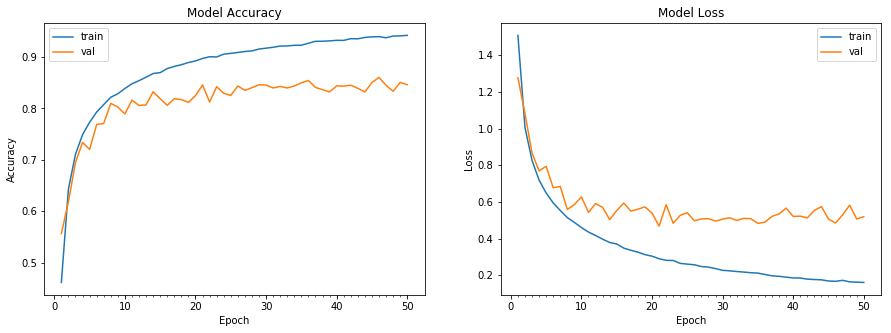

Accuracy on test data is: 84.63


In [36]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 64),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

###I could get improved accuracy to 86.05% at the 46th Epoch